# Optimization with Exact Objective Function

This notebook supplements SIMT ITS Analytics Projects lecture on Prescriptive Analytics Case Studies Overview by [Mansur M. Arief](https://mansurarief.github.io/).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/analytics-project-simt-its/analytics-project-simt-its.github.io/blob/main/notebooks/zoopt_with_exact_objective_function.ipynb)

In [8]:
%pip install zoopt

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def fx(x, scale=1):
    x = x/scale
    out = (x-1) * (x+1) * (x-2) * (x+2) * (x-3)
    return out


## Objective function

Let's plot our objective function $f(x)$ for $x$ in range $[-2.5, 3.5]$

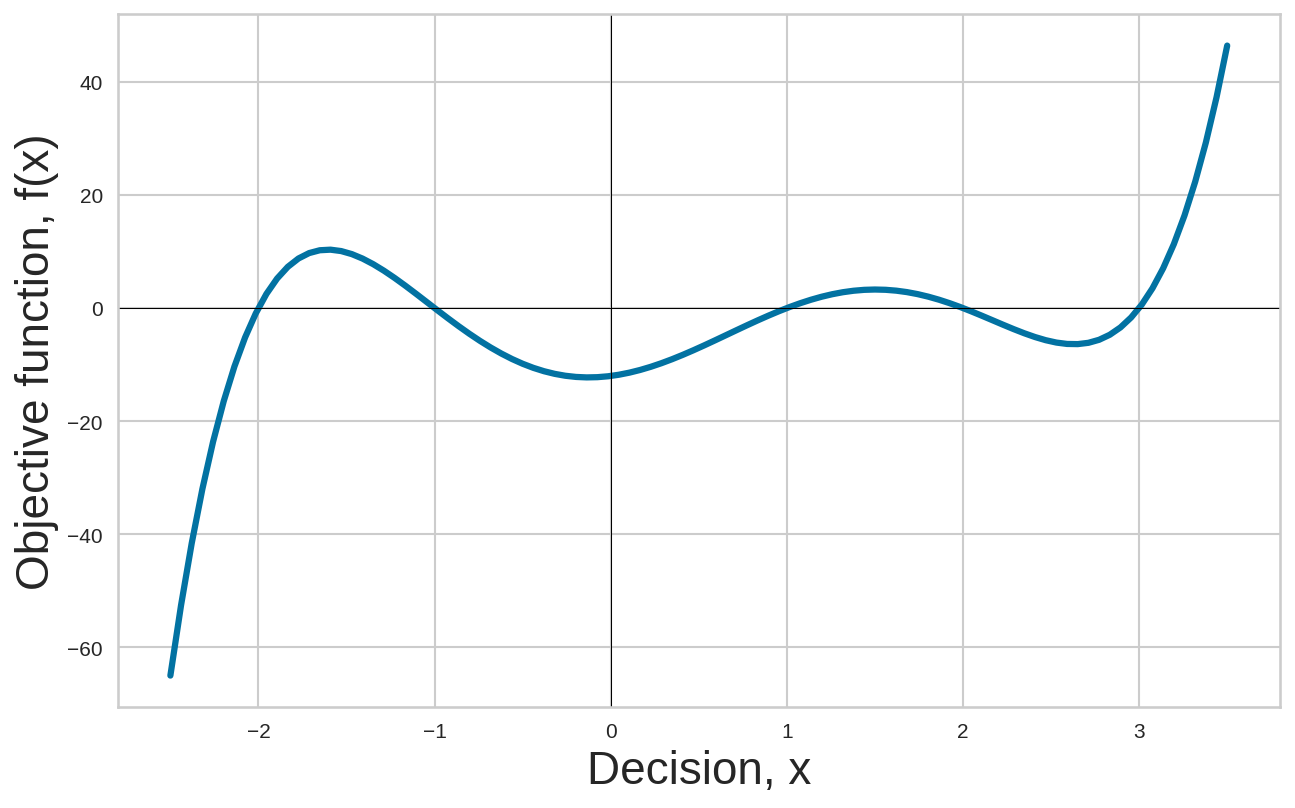

In [95]:
x_values = np.linspace(-2.5, 3.5, 100)
y_values = fx(x_values)


plt.figure(figsize=(10, 6), dpi=150)
plt.plot(x_values, y_values, label='', linewidth=3, linestyle='-', alpha=1.)
plt.xlabel('Decision, x', fontsize=22)
plt.ylabel('Objective function, f(x)', fontsize=22)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

## Solve using `zoopt` (Zero order optimization technique)

In [73]:
from zoopt import Dimension, ValueType, Dimension2, Objective, Parameter, Opt, ExpOpt

# For logging purposes
best_val = 999999
log_path = "optimization_results.txt"
open(log_path, "w").close()


# Define dimensionality and range of x
dim_size = 1
dim = Dimension(dim_size, [[-2.5, 3.5]]*dim_size, [True]*dim_size)

# Define the objective function that zoopt can interact with
def objective_function(solution):
    global best_val
    x = solution.get_x()
    obj_val = fx(x[0])
    if obj_val <= best_val:
      with open(log_path, "a") as file:
          file.write(f"{x[0]}, {obj_val}\n")
          best_val = obj_val
    return obj_val

obj = Objective(func=objective_function, dim=dim)

Try out evaluating the objective function using `zoopt` interface

In [72]:
class TestSolution:
    def __init__(self, x):
        self.x = x

    def get_x(self):
        return self.x

x1 = TestSolution([0.2])
print(objective_function(x1))



-10.64448


Let's solve

In [87]:
param = Parameter(budget=1000,
                  time_budget=10,
                  exploration_rate=0.01)

solution = Opt.min(obj, param)

[zoopt] [break loop] because distinct_flag is false too much times
[zoopt] x: [-2.5]
[zoopt] value: -64.96875


This shows the best solution's objective value improvement over time

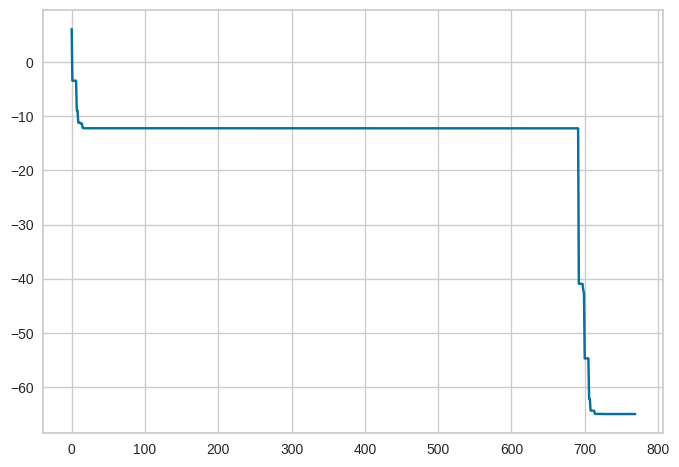

In [88]:
plt.plot(obj.get_history_bestsofar())

We can also plot the best so far solution over time through our log

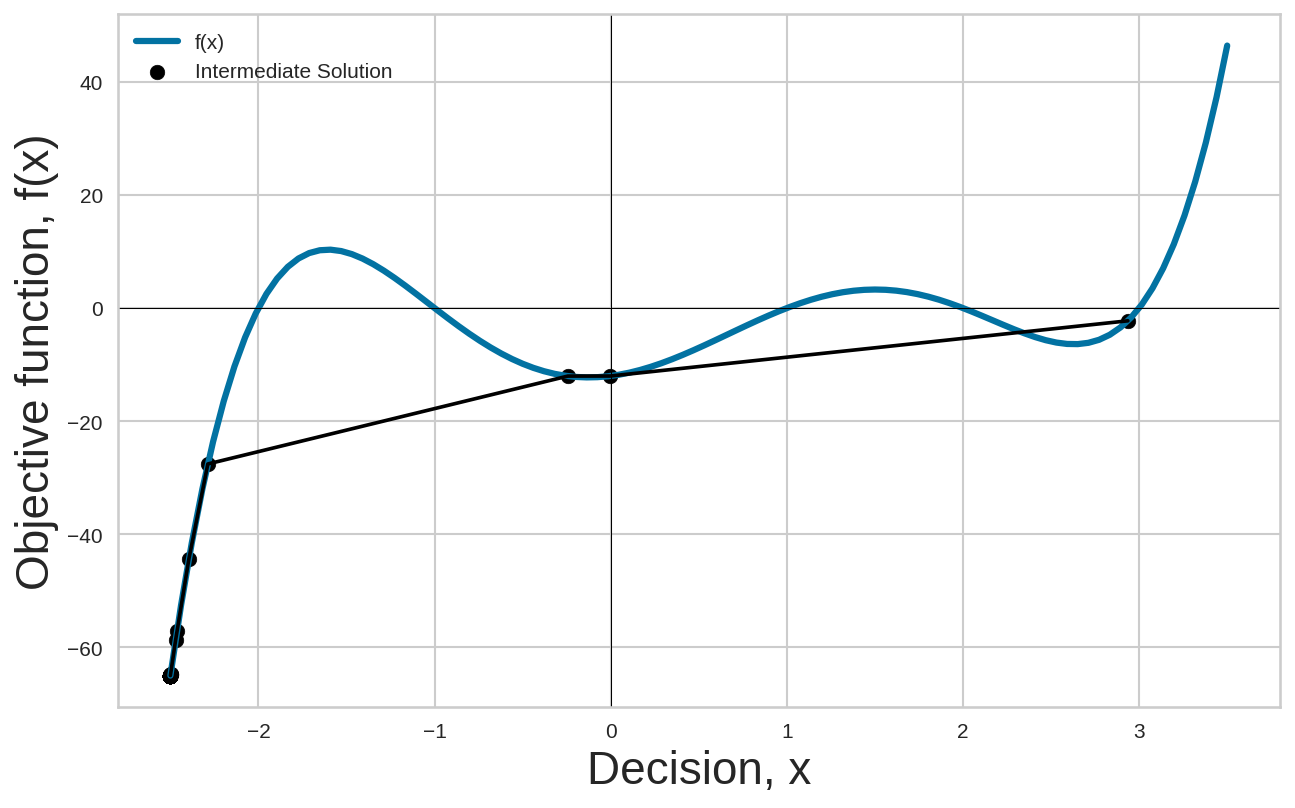

In [96]:
import pandas as pd

# Read the log
df_result = pd.read_csv(log_path, header=None, names=['x', 'fx'])

# Plot
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(x_values, y_values, label='f(x)', linewidth=3, linestyle='-', alpha=1.)
plt.scatter(df_result["x"], df_result["fx"], c="black", label="Intermediate Solution")
plt.plot(df_result["x"], df_result["fx"], color="black")
plt.xlabel('Decision, x', fontsize=22)
plt.ylabel('Objective function, f(x)', fontsize=22)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

## Dealing with multiple minima

To deal with multiple minima, we can use random initialization and repeat the procedure a few times. Let's do 100 runs.

In [93]:
solutions = ExpOpt.min(obj, param, repeat=120)

[zoopt] x: [-2.4999999999999996]
[zoopt] value: -64.96874999999991
[zoopt] The best solution is:
[zoopt] x: [-2.4999999999999996]
[zoopt] value: -64.96874999999991
[zoopt] [break loop] because distinct_flag is false too much times
[zoopt] x: [-2.5]
[zoopt] value: -64.96875
[zoopt] The best solution is:
[zoopt] x: [-2.5]
[zoopt] value: -64.96875
[zoopt] [break loop] because distinct_flag is false too much times
[zoopt] x: [-2.5]
[zoopt] value: -64.96875
[zoopt] The best solution is:
[zoopt] x: [-2.5]
[zoopt] value: -64.96875
[zoopt] [break loop] because distinct_flag is false too much times
[zoopt] x: [-2.5]
[zoopt] value: -64.96875
[zoopt] The best solution is:
[zoopt] x: [-2.5]
[zoopt] value: -64.96875
[zoopt] [break loop] because distinct_flag is false too much times
[zoopt] x: [-2.5]
[zoopt] value: -64.96875
[zoopt] The best solution is:
[zoopt] x: [-2.5]
[zoopt] value: -64.96875
[zoopt] [break loop] because distinct_flag is false too much times
[zoopt] x: [-2.5]
[zoopt] value: -64.

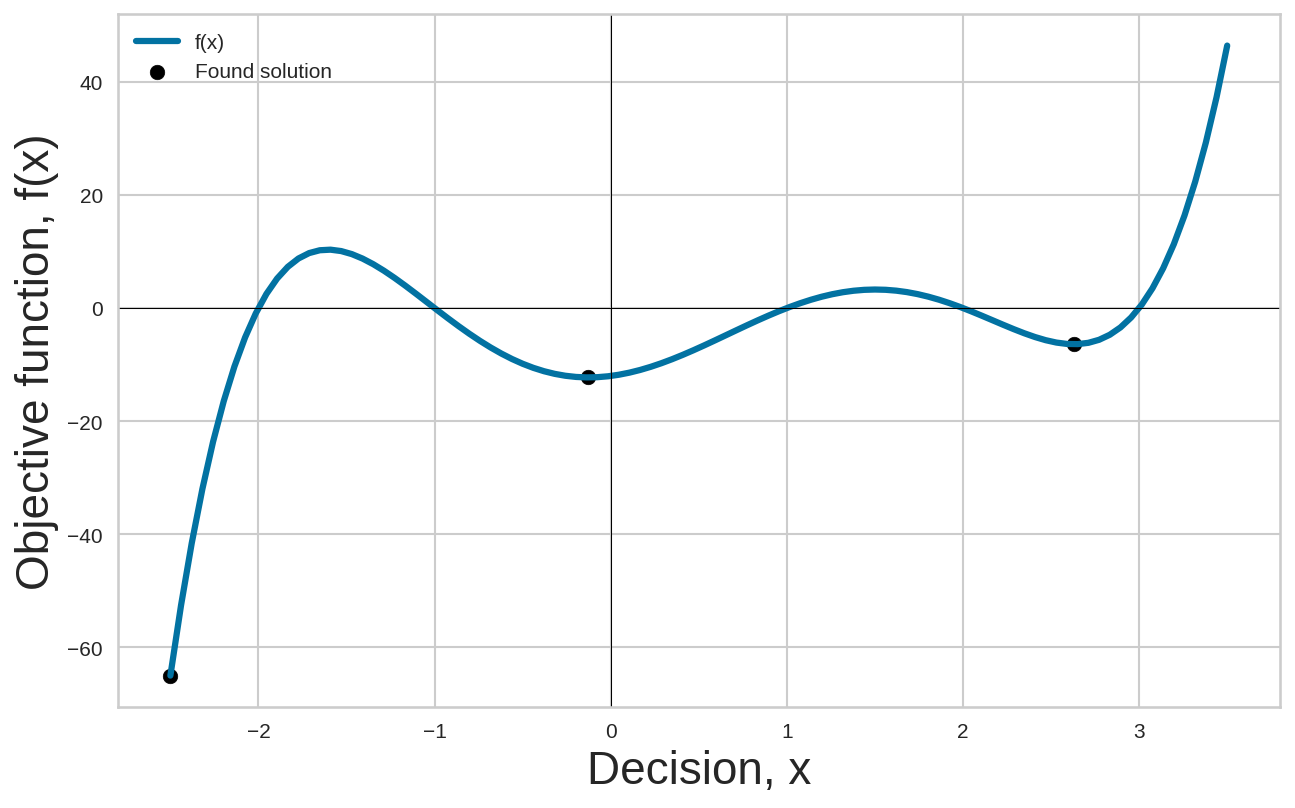

In [97]:
# Get all unique solutions
xstars = []
for solution_ in solutions:
  xstars.append(solution_.get_x())
xstars = np.unique(np.unique(xstars).round(decimals=4))


# Plot
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(x_values, y_values, label='f(x)', linewidth=3, linestyle='-', alpha=1.)
plt.scatter(xstars, fx(xstars), c="black", label="Found solution")
plt.xlabel('Decision, x', fontsize=22)
plt.ylabel('Objective function, f(x)', fontsize=22)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

